<a href="https://colab.research.google.com/github/SokichiFujita/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Chapter4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

Text(0, 0.5, 'y')

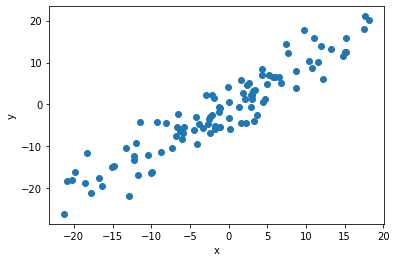

In [3]:
X = torch.randn(100,1) * 10
y = X + torch.randn(100,1) * 3
plt.plot(X.numpy(),y.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred  

In [5]:
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.7623]], requires_grad=True), Parameter containing:
tensor([0.6185], requires_grad=True)]


In [6]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [7]:
[w,b] = model.parameters()
print(w)
print(b)

Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [8]:
w1 = w[0][0]
b1 = b[0]
print(w1,b1)

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)


In [0]:
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1 * x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

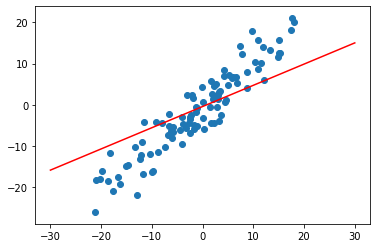

In [17]:
plot_fit('Initial Model')